# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 5.0MB/s 


In [2]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 May 21 17:02 datalab


In [3]:
from google.colab import files
uploaded = files.upload()

Saving helper.py to helper.py
Saving problem_unittests.py to problem_unittests.py


In [4]:
!ls -l

total 20
drwxr-xr-x 1 root root 4096 May 21 17:02 datalab
-rw-r--r-- 1 root root 5808 Jun  9 02:15 helper.py
-rw-r--r-- 1 root root 7126 Jun  9 02:15 problem_unittests.py


In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile
from time import time
import datetime

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [00:40, 4.22MB/s]                           


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


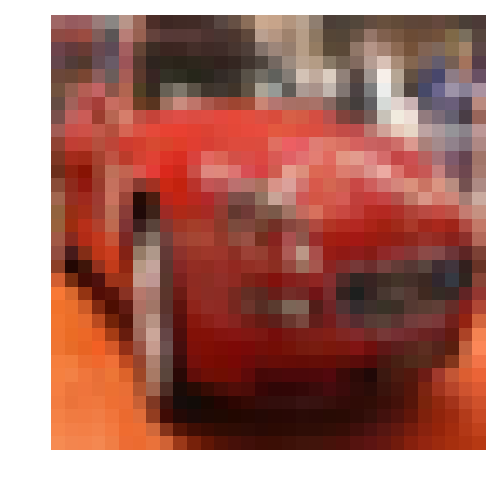

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [7]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return (x - np.amin(x))/(np.amax(x) - np.amin(x))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [8]:
from sklearn.preprocessing import LabelBinarizer
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(0,10,1))
    return label_binarizer.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [0]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [0]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [11]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    image_height = image_shape[0]
    image_width = image_shape[1]
    color_channels = image_shape[2]
    return tf.placeholder(tf.float32, [None, image_height, image_width, color_channels], name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [12]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    # Convolution filter
    filter_size_height = conv_ksize[0]
    filter_size_width = conv_ksize[1]
    
    # Image Properties
    # image_width = 10
    # image_height = 10
    color_channels = x_tensor.get_shape().as_list()[3]

    # Weight and bias
    weight = tf.Variable(tf.truncated_normal([filter_size_height, filter_size_width, color_channels, conv_num_outputs]))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    # Apply Convolution
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    
    # Apply activation function
    conv_layer = tf.nn.relu(conv_layer)
    
    # Apply Max Pooling
    conv_layer = tf.nn.max_pool(
        conv_layer,
        ksize=[1, pool_ksize[0], pool_ksize[1], 1],
        strides=[1, pool_strides[0], pool_strides[1], 1],
        padding='SAME')
    
    return conv_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [13]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [14]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    width = x_tensor.get_shape().as_list()[1]
    
    # Weight and bias
    weights = tf.Variable(tf.truncated_normal([width, num_outputs]))
    biases = tf.Variable(tf.zeros(num_outputs))
    
    # Fully connected layer
    fc1 = tf.add(tf.matmul(x_tensor, weights), biases)
    fc1 = tf.nn.relu(fc1)
    return fc1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [15]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    width = x_tensor.get_shape().as_list()[1]
    
    # Weight and bias
    weights = tf.Variable(tf.truncated_normal([width, num_outputs]))
    biases = tf.Variable(tf.zeros(num_outputs))
    
    # Output layer
    out = tf.add(tf.matmul(x_tensor, weights), biases)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [16]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv = conv2d_maxpool(x, 64, [3,3], [1,1], [2,2], [2,2])
    conv = conv2d_maxpool(conv, 128, [3,3], [1,1], [2,2], [2,2])
    conv = conv2d_maxpool(conv, 256, [3,3], [1,1], [2,2], [2,2])

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    f = flatten(conv)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
#     fc = fully_conn(f, 128)
    fc = fully_conn(f, 256)
    fc = tf.nn.dropout(fc, keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    logits = output(fc, 10)
    
    # TODO: return output
    return logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [17]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [0]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    validation_accuracy = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0})
    print('Loss: {}; Validation Accuracy: {}'.format(loss, validation_accuracy))
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [0]:
# TODO: Tune Parameters
epochs = 200
batch_size = 128
keep_probability = 1.

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
start = time()
print('Start time: {}'.format(datetime.datetime.now()))
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        local_start = time()
#         print('Local Start time: {}'.format(datetime.datetime.now()))
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)
        local_end = time()
        print('Duration: {}'.format(local_end - local_start))
end = time()
print('End time: {}'.format(datetime.datetime.now()))
print('Total time: {}'.format(end - start))

Checking the Training on a Single Batch...
Start time: 2018-06-09 02:17:06.953753
Epoch  1, CIFAR-10 Batch 1:  Loss: 41138.1328125; Validation Accuracy: 0.25699999928474426
Duration: 4.971262693405151
Epoch  2, CIFAR-10 Batch 1:  Loss: 25107.646484375; Validation Accuracy: 0.2964000105857849
Duration: 2.1710124015808105
Epoch  3, CIFAR-10 Batch 1:  Loss: 19157.216796875; Validation Accuracy: 0.31220000982284546
Duration: 1.92879056930542
Epoch  4, CIFAR-10 Batch 1:  Loss: 14302.708984375; Validation Accuracy: 0.32760000228881836
Duration: 1.9281566143035889
Epoch  5, CIFAR-10 Batch 1:  Loss: 11712.841796875; Validation Accuracy: 0.34360000491142273
Duration: 1.9333088397979736
Epoch  6, CIFAR-10 Batch 1:  Loss: 10069.6142578125; Validation Accuracy: 0.3515999913215637
Duration: 1.9326610565185547
Epoch  7, CIFAR-10 Batch 1:  Loss: 7757.2880859375; Validation Accuracy: 0.3578000068664551
Duration: 1.9280855655670166
Epoch  8, CIFAR-10 Batch 1:  Loss: 6539.8388671875; Validation Accuracy

Epoch 85, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4643999934196472
Duration: 1.925896406173706
Epoch 86, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.46700000762939453
Duration: 1.9194204807281494
Epoch 87, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4674000144004822
Duration: 1.930952548980713
Epoch 88, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4675999879837036
Duration: 1.9281232357025146
Epoch 89, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4514000117778778
Duration: 1.9217109680175781
Epoch 90, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.45579999685287476
Duration: 1.927690029144287
Epoch 91, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4819999933242798
Duration: 1.9283511638641357
Epoch 92, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.47119998931884766
Duration: 1.9251365661621094
Epoch 93, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4643999934196472
Duration: 1.9229629039764404
Epoch 94, CIFAR-10 

Epoch 173, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.503000020980835
Duration: 1.9282078742980957
Epoch 174, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.49300000071525574
Duration: 1.9365622997283936
Epoch 175, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4973999857902527
Duration: 1.9447314739227295
Epoch 176, CIFAR-10 Batch 1:  Loss: 11.341211318969727; Validation Accuracy: 0.5059999823570251
Duration: 1.9280550479888916
Epoch 177, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.49959999322891235
Duration: 1.9268968105316162
Epoch 178, CIFAR-10 Batch 1:  Loss: 6.291711330413818; Validation Accuracy: 0.5094000101089478
Duration: 1.9339497089385986
Epoch 179, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5004000067710876
Duration: 1.9314024448394775
Epoch 180, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5013999938964844
Duration: 1.927988052368164
Epoch 181, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4973999857902527
Duration: 

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss: 60914.15625; Validation Accuracy: 0.2264000028371811
Epoch  1, CIFAR-10 Batch 2:  Loss: 42568.7890625; Validation Accuracy: 0.25699999928474426
Epoch  1, CIFAR-10 Batch 3:  Loss: 36995.3046875; Validation Accuracy: 0.28279998898506165
Epoch  1, CIFAR-10 Batch 4:  Loss: 26205.4609375; Validation Accuracy: 0.2939999997615814
Epoch  1, CIFAR-10 Batch 5:  Loss: 28479.1875; Validation Accuracy: 0.30640000104904175
Epoch  2, CIFAR-10 Batch 1:  Loss: 18346.990234375; Validation Accuracy: 0.32440000772476196
Epoch  2, CIFAR-10 Batch 2:  Loss: 21057.8359375; Validation Accuracy: 0.32600000500679016
Epoch  2, CIFAR-10 Batch 3:  Loss: 18004.05859375; Validation Accuracy: 0.3312000036239624
Epoch  2, CIFAR-10 Batch 4:  Loss: 13924.2685546875; Validation Accuracy: 0.3418000042438507
Epoch  2, CIFAR-10 Batch 5:  Loss: 19434.46484375; Validation Accuracy: 0.326200008392334
Epoch  3, CIFAR-10 Batch 1:  Loss: 12874.75390625; Validation Accuracy: 0.35400000

Epoch 20, CIFAR-10 Batch 2:  Loss: 154.18077087402344; Validation Accuracy: 0.4514000117778778
Epoch 20, CIFAR-10 Batch 3:  Loss: 53.64421844482422; Validation Accuracy: 0.45019999146461487
Epoch 20, CIFAR-10 Batch 4:  Loss: 227.31973266601562; Validation Accuracy: 0.4666000008583069
Epoch 20, CIFAR-10 Batch 5:  Loss: 132.00613403320312; Validation Accuracy: 0.46700000762939453
Epoch 21, CIFAR-10 Batch 1:  Loss: 328.7276916503906; Validation Accuracy: 0.4641999900341034
Epoch 21, CIFAR-10 Batch 2:  Loss: 91.0591049194336; Validation Accuracy: 0.4528000056743622
Epoch 21, CIFAR-10 Batch 3:  Loss: 4.039770603179932; Validation Accuracy: 0.45500001311302185
Epoch 21, CIFAR-10 Batch 4:  Loss: 228.6611328125; Validation Accuracy: 0.46219998598098755
Epoch 21, CIFAR-10 Batch 5:  Loss: 144.85739135742188; Validation Accuracy: 0.46799999475479126
Epoch 22, CIFAR-10 Batch 1:  Loss: 228.02197265625; Validation Accuracy: 0.4602000117301941
Epoch 22, CIFAR-10 Batch 2:  Loss: 52.25151443481445; Val

Epoch 39, CIFAR-10 Batch 3:  Loss: 1.759710669517517; Validation Accuracy: 0.4681999981403351
Epoch 39, CIFAR-10 Batch 4:  Loss: 20.89483070373535; Validation Accuracy: 0.4733999967575073
Epoch 39, CIFAR-10 Batch 5:  Loss: 14.9754638671875; Validation Accuracy: 0.4864000082015991
Epoch 40, CIFAR-10 Batch 1:  Loss: 22.575244903564453; Validation Accuracy: 0.48339998722076416
Epoch 40, CIFAR-10 Batch 2:  Loss: 3.728764295578003; Validation Accuracy: 0.4758000075817108
Epoch 40, CIFAR-10 Batch 3:  Loss: 5.808282375335693; Validation Accuracy: 0.4742000102996826
Epoch 40, CIFAR-10 Batch 4:  Loss: 4.781330585479736; Validation Accuracy: 0.4726000130176544
Epoch 40, CIFAR-10 Batch 5:  Loss: 2.5415375232696533; Validation Accuracy: 0.4790000021457672
Epoch 41, CIFAR-10 Batch 1:  Loss: 17.03287696838379; Validation Accuracy: 0.490200012922287
Epoch 41, CIFAR-10 Batch 2:  Loss: 13.726788520812988; Validation Accuracy: 0.4659999907016754
Epoch 41, CIFAR-10 Batch 3:  Loss: 0.26971349120140076; Va

Epoch 59, CIFAR-10 Batch 1:  Loss: 1.1773866415023804; Validation Accuracy: 0.5026000142097473
Epoch 59, CIFAR-10 Batch 2:  Loss: 0.251972496509552; Validation Accuracy: 0.5126000046730042
Epoch 59, CIFAR-10 Batch 3:  Loss: 0.5377700924873352; Validation Accuracy: 0.5081999897956848
Epoch 59, CIFAR-10 Batch 4:  Loss: 2.4008543491363525; Validation Accuracy: 0.4936000108718872
Epoch 59, CIFAR-10 Batch 5:  Loss: 0.5889587998390198; Validation Accuracy: 0.5076000094413757
Epoch 60, CIFAR-10 Batch 1:  Loss: 0.46001893281936646; Validation Accuracy: 0.49900001287460327
Epoch 60, CIFAR-10 Batch 2:  Loss: 2.3643798828125; Validation Accuracy: 0.5090000033378601
Epoch 60, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5123999714851379
Epoch 60, CIFAR-10 Batch 4:  Loss: 11.262961387634277; Validation Accuracy: 0.5008000135421753
Epoch 60, CIFAR-10 Batch 5:  Loss: 0.4359217584133148; Validation Accuracy: 0.5052000284194946
Epoch 61, CIFAR-10 Batch 1:  Loss: 0.3799353241920471; Validation A

Epoch 78, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5317999720573425
Epoch 78, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5212000012397766
Epoch 78, CIFAR-10 Batch 5:  Loss: 0.0024803283158689737; Validation Accuracy: 0.5315999984741211
Epoch 79, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5181999802589417
Epoch 79, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.521399974822998
Epoch 79, CIFAR-10 Batch 3:  Loss: 0.011001366190612316; Validation Accuracy: 0.5321999788284302
Epoch 79, CIFAR-10 Batch 4:  Loss: 6.844656127213966e-06; Validation Accuracy: 0.5278000235557556
Epoch 79, CIFAR-10 Batch 5:  Loss: 5.960463678178485e-09; Validation Accuracy: 0.522599995136261
Epoch 80, CIFAR-10 Batch 1:  Loss: 2.6915645599365234; Validation Accuracy: 0.5091999769210815
Epoch 80, CIFAR-10 Batch 2:  Loss: 0.314384788274765; Validation Accuracy: 0.5153999924659729
Epoch 80, CIFAR-10 Batch 3:  Loss: 8.535303115844727; Validation Accuracy: 0.5181999802589417
Epoch 80

Epoch 98, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5404000282287598
Epoch 98, CIFAR-10 Batch 2:  Loss: 0.13280007243156433; Validation Accuracy: 0.5332000255584717
Epoch 98, CIFAR-10 Batch 3:  Loss: 2.1755599277639703e-07; Validation Accuracy: 0.5397999882698059
Epoch 98, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5166000127792358
Epoch 98, CIFAR-10 Batch 5:  Loss: 0.009279523976147175; Validation Accuracy: 0.5404000282287598
Epoch 99, CIFAR-10 Batch 1:  Loss: 0.27763137221336365; Validation Accuracy: 0.5375999808311462
Epoch 99, CIFAR-10 Batch 2:  Loss: 0.06575267016887665; Validation Accuracy: 0.5315999984741211
Epoch 99, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.527400016784668
Epoch 99, CIFAR-10 Batch 4:  Loss: 0.00010648304305505008; Validation Accuracy: 0.5325999855995178
Epoch 99, CIFAR-10 Batch 5:  Loss: 0.37158113718032837; Validation Accuracy: 0.5382000207901001
Epoch 100, CIFAR-10 Batch 1:  Loss: 1.1454126834869385; Validation Accuracy: 0.533

Epoch 117, CIFAR-10 Batch 2:  Loss: 1.2248453913343837e-06; Validation Accuracy: 0.5436000227928162
Epoch 117, CIFAR-10 Batch 3:  Loss: 0.0038485799450427294; Validation Accuracy: 0.555400013923645
Epoch 117, CIFAR-10 Batch 4:  Loss: 1.221724271774292; Validation Accuracy: 0.5519999861717224
Epoch 117, CIFAR-10 Batch 5:  Loss: 0.0001491254079155624; Validation Accuracy: 0.5604000091552734
Epoch 118, CIFAR-10 Batch 1:  Loss: 6.556504672516894e-08; Validation Accuracy: 0.5386000275611877
Epoch 118, CIFAR-10 Batch 2:  Loss: 6.109402761467209e-07; Validation Accuracy: 0.5541999936103821
Epoch 118, CIFAR-10 Batch 3:  Loss: 0.01923310197889805; Validation Accuracy: 0.5465999841690063
Epoch 118, CIFAR-10 Batch 4:  Loss: 0.026187870651483536; Validation Accuracy: 0.5386000275611877
Epoch 118, CIFAR-10 Batch 5:  Loss: 0.16367876529693604; Validation Accuracy: 0.5472000241279602
Epoch 119, CIFAR-10 Batch 1:  Loss: 2.4715847969055176; Validation Accuracy: 0.555400013923645
Epoch 119, CIFAR-10 Bat

Epoch 136, CIFAR-10 Batch 2:  Loss: 0.04169348627328873; Validation Accuracy: 0.5454000234603882
Epoch 136, CIFAR-10 Batch 3:  Loss: 1.2218926315199496e-07; Validation Accuracy: 0.5608000159263611
Epoch 136, CIFAR-10 Batch 4:  Loss: 0.39547228813171387; Validation Accuracy: 0.5514000058174133
Epoch 136, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5676000118255615
Epoch 137, CIFAR-10 Batch 1:  Loss: 2.0507552108028904e-05; Validation Accuracy: 0.5447999835014343
Epoch 137, CIFAR-10 Batch 2:  Loss: 0.32359665632247925; Validation Accuracy: 0.5486000180244446
Epoch 137, CIFAR-10 Batch 3:  Loss: 0.40458807349205017; Validation Accuracy: 0.5483999848365784
Epoch 137, CIFAR-10 Batch 4:  Loss: 0.09119530767202377; Validation Accuracy: 0.5442000031471252
Epoch 137, CIFAR-10 Batch 5:  Loss: 0.013874630443751812; Validation Accuracy: 0.5519999861717224
Epoch 138, CIFAR-10 Batch 1:  Loss: 0.00041246769251301885; Validation Accuracy: 0.545199990272522
Epoch 138, CIFAR-10 Batch 2:  Loss: 0

Epoch 155, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5666000247001648
Epoch 155, CIFAR-10 Batch 3:  Loss: 1.2099450259484001e-06; Validation Accuracy: 0.5654000043869019
Epoch 155, CIFAR-10 Batch 4:  Loss: 0.0003459263243712485; Validation Accuracy: 0.5619999766349792
Epoch 155, CIFAR-10 Batch 5:  Loss: 0.32163843512535095; Validation Accuracy: 0.5672000050544739
Epoch 156, CIFAR-10 Batch 1:  Loss: 1.6842067241668701; Validation Accuracy: 0.5580000281333923
Epoch 156, CIFAR-10 Batch 2:  Loss: 0.003044395474717021; Validation Accuracy: 0.5690000057220459
Epoch 156, CIFAR-10 Batch 3:  Loss: 2.5122099032159895e-06; Validation Accuracy: 0.5667999982833862
Epoch 156, CIFAR-10 Batch 4:  Loss: 0.42781123518943787; Validation Accuracy: 0.5655999779701233
Epoch 156, CIFAR-10 Batch 5:  Loss: 0.03858984261751175; Validation Accuracy: 0.5694000124931335
Epoch 157, CIFAR-10 Batch 1:  Loss: 0.3671436309814453; Validation Accuracy: 0.5649999976158142
Epoch 157, CIFAR-10 Batch 2:  Loss: 0.1

Epoch 174, CIFAR-10 Batch 3:  Loss: 0.0717877596616745; Validation Accuracy: 0.5734000205993652
Epoch 174, CIFAR-10 Batch 4:  Loss: 0.1203063502907753; Validation Accuracy: 0.5515999794006348
Epoch 174, CIFAR-10 Batch 5:  Loss: 0.0020076176151633263; Validation Accuracy: 0.5648000240325928
Epoch 175, CIFAR-10 Batch 1:  Loss: 0.4486681818962097; Validation Accuracy: 0.5654000043869019
Epoch 175, CIFAR-10 Batch 2:  Loss: 0.014597726054489613; Validation Accuracy: 0.5663999915122986
Epoch 175, CIFAR-10 Batch 3:  Loss: 0.05622716620564461; Validation Accuracy: 0.5654000043869019
Epoch 175, CIFAR-10 Batch 4:  Loss: 0.006989859044551849; Validation Accuracy: 0.5633999705314636
Epoch 175, CIFAR-10 Batch 5:  Loss: 0.20121784508228302; Validation Accuracy: 0.5622000098228455
Epoch 176, CIFAR-10 Batch 1:  Loss: 0.38038140535354614; Validation Accuracy: 0.5676000118255615
Epoch 176, CIFAR-10 Batch 2:  Loss: 4.9506248615216464e-05; Validation Accuracy: 0.5687999725341797
Epoch 176, CIFAR-10 Batch 

Epoch 193, CIFAR-10 Batch 3:  Loss: 9.979764399759006e-06; Validation Accuracy: 0.5442000031471252
Epoch 193, CIFAR-10 Batch 4:  Loss: 0.1045372486114502; Validation Accuracy: 0.5738000273704529
Epoch 193, CIFAR-10 Batch 5:  Loss: 0.7391675114631653; Validation Accuracy: 0.5820000171661377
Epoch 194, CIFAR-10 Batch 1:  Loss: 0.022115737199783325; Validation Accuracy: 0.5752000212669373
Epoch 194, CIFAR-10 Batch 2:  Loss: 0.026707690209150314; Validation Accuracy: 0.5781999826431274
Epoch 194, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5839999914169312
Epoch 194, CIFAR-10 Batch 4:  Loss: 0.002690791618078947; Validation Accuracy: 0.5717999935150146
Epoch 194, CIFAR-10 Batch 5:  Loss: 0.22853043675422668; Validation Accuracy: 0.5803999900817871
Epoch 195, CIFAR-10 Batch 1:  Loss: 0.01773451268672943; Validation Accuracy: 0.5795999765396118
Epoch 195, CIFAR-10 Batch 2:  Loss: 0.08350493013858795; Validation Accuracy: 0.5673999786376953
Epoch 195, CIFAR-10 Batch 3:  Loss: 8.55312

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.5848496835443038



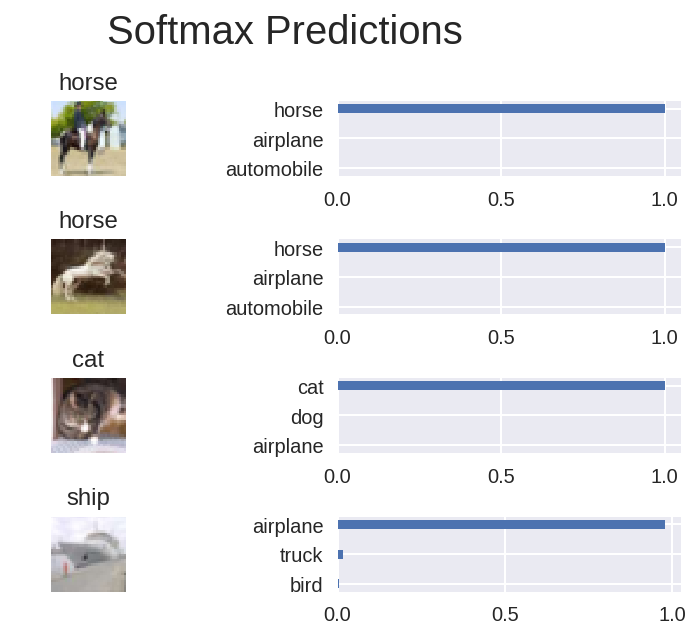

In [22]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.